<a href="https://colab.research.google.com/github/SC30GSWNBA/Netflix_EDA_Recommendation_Case_Study/blob/main/Business_Case_Netflix_Data_Exploration_and_Visualisation_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

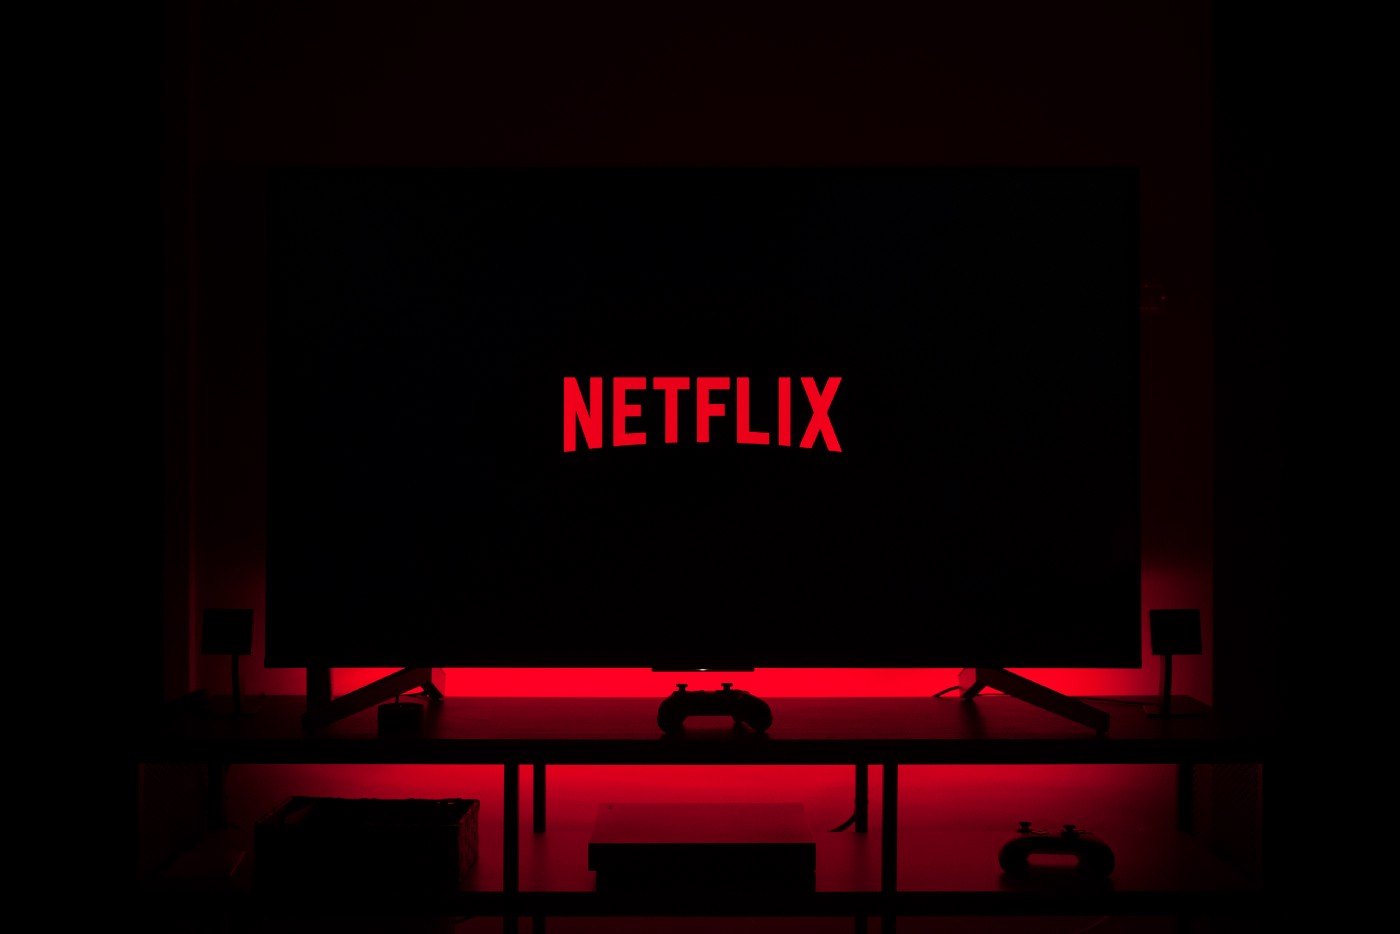



**About Netflix**


Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

**Business Problem**

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

**Dataset**

**Link:** https://drive.google.com/drive/u/0/folders/1DPlqVq3_9Xk2RcgMmIzdvzfzBRM1RPgf

(After clicking on the above link, you can download the files by right-clicking on the page and clicking on "Save As", then naming the file as per your wish, with .csv as the extension.)

The dataset provided to you consists of a list of all the TV shows/movies available on Netflix:

**Show_id:** Unique ID for every Movie / Tv Show

**Type:** Identifier - A Movie or TV Show

**Title:** Title of the Movie / Tv Show

**Director:** Director of the Movie

**Cast:** Actors involved in the movie/show

**Country:** Country where the movie/show was produced

**Date_added:** Date it was added on Netflix

**Release_year:** Actual Release year of the movie/show

**Rating:** TV Rating of the movie/show

**Duration:** Total Duration - in minutes or number of seasons

**Listed_in:** Genre

**Description:** The summary description

# *Importing Libraries and Dataset*

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
warnings.filterwarnings('ignore')

**Loading Data into Colab**

In [4]:
from google.colab import files
uploaded = files.upload()

Saving netflix.csv to netflix.csv


In [5]:
netflix = pd.read_csv(io.StringIO(uploaded['netflix.csv'].decode('utf-8')))

**Inspecting First Few Rows of the DataFrame**

In [6]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Let's look at the datatype and the number of non-null values in the netflix dataframe**

In [7]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**So the following columns have null values in the dataset:**

> director: 2634 null values 

> cast: 825 null values

> country: 931 null values

> date_added: 10 null values

> rating: 4 null values

> duration: 3 null values

# *Data Preprocessing*

**Unique Values in each column**

Before we move ahead, let's identify which columns in the dataframe can be used as unique identifier for each row

In [8]:
for i in netflix.columns:
  print(f'{i} has {netflix[i].nunique()} unique values')

show_id has 8807 unique values
type has 2 unique values
title has 8807 unique values
director has 4528 unique values
cast has 7692 unique values
country has 748 unique values
date_added has 1767 unique values
release_year has 74 unique values
rating has 17 unique values
duration has 220 unique values
listed_in has 514 unique values
description has 8775 unique values


So, **show_id** and **title** are **unique identifiers of any row in the dataset**

**Replacement/Imputation of Null Values**

> We can replace null values in director, cast, country, date_added columns with '**Data_Not_Available**' as null values for director, cast and country columns are difficult to impute.

> Null Values for rating and duration require further inspection before we can replace/impute null values in those columns.

In [9]:
# Replacing Null values with 'Data Not Available' in director, cast and country columns

netflix["director"].fillna("Data_Not_Available", inplace = True)
netflix["cast"].fillna("Data_Not_Available", inplace = True)
netflix["country"].fillna("Data_Not_Available", inplace = True)
netflix["date_added"].fillna("Data_Not_Available", inplace = True)

In [10]:
# Inspecting Null values in the date_added, rating and duration columns

netflix[(netflix.rating.isnull()) | (netflix.duration.isnull())]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,Data_Not_Available,"Oprah Winfrey, Ava DuVernay",Data_Not_Available,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,Data_Not_Available,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,Data_Not_Available,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."




> Seems like 'duration' for show_id - 5542, 5543 and 5544 have been wrongly entered into 'rating' column. So we need to move it back to 'duration' column, making rating column empty/null for show ids - 5542, 5543 and 5544


In [11]:
netflix.loc[netflix["show_id"] == "s5542", "duration"] = '74 min'
netflix.loc[netflix["show_id"] == "s5795", "duration"] = '84 min'
netflix.loc[netflix["show_id"] == "s5814", "duration"] = '66 min'
netflix.loc[netflix["show_id"] == "s5542", "rating"] = np.nan
netflix.loc[netflix["show_id"] == "s5795", "rating"] = np.nan
netflix.loc[netflix["show_id"] == "s5814", "rating"] = np.nan

There are certain rows in the dataset that require cleaning for country. As they start and end with unnecessary special characters like ,

In [12]:
netflix['country'] = netflix['country'].str.lstrip(', ')
netflix['country'] = netflix['country'].str.rstrip(',')

# *Let's look at movies and tv shows released per year over the last 20-30 years*

### Business Insight: The dataset has more Movies (6131) as compared to TV shows (2676)

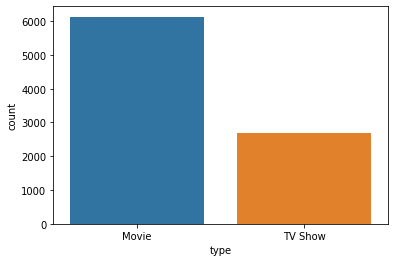

In [13]:
sns.countplot(data = netflix, x = 'type', order = netflix['type'].value_counts().index, linewidth=0.5)

### Creating separate dataframes - netflix_movies and netflix_tvshows to analyse the data related to movies and tv shows separately

In [14]:
netflix_movies = netflix[netflix['type'] == 'Movie']
netflix_tvshows = netflix[netflix['type'] == 'TV Show']

### Counting the number of Movies and TV Shows released every year

In [15]:
movie_count = netflix_movies['release_year'].value_counts()
tvshows_count = netflix_tvshows['release_year'].value_counts()
movie_count.sort_index(inplace = True)
tvshows_count.sort_index(inplace = True)

### Business Insight from the plot - Movies Released Per Year (See Below Figure)  

> The number of movies has increased steadily from 1942 to 2017 on netflix, but has seen a sharp decline since 2017.

> The content of tv shows on the other hand has seen a sharp rise from 2010 to 2020, growing 10 folds in the last decade.

> In 2021, for the first time, the number of TV Shows has surpassed the number of Movies on netflix

> Current set of attributes however are not sufficient to debate on TV Shows vs Movies. Depending on viewership/user_rating/completion_rate/budget it can be said with certainity that TV Shows are more profitable to produce/add for Netflix when compared to Movies.



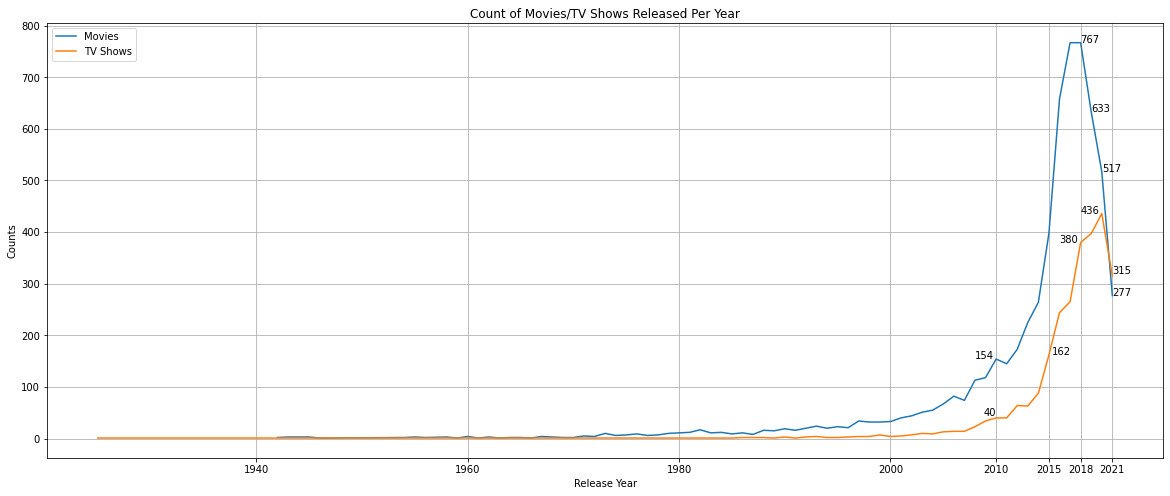

In [16]:
plt.figure(figsize=(20,8))
plt.plot(movie_count.index,movie_count.values)
plt.plot(tvshows_count.index, tvshows_count.values)
plt.xlabel('Release Year')
plt.ylabel('Counts')
plt.title('Count of Movies/TV Shows Released Per Year')
plt.text(2008,155,movie_count[2010])
plt.text(2018,movie_count[2018],movie_count[2018])
plt.text(2019,movie_count[2019],movie_count[2019])
plt.text(2020,movie_count[2020],movie_count[2020])
plt.text(2021,movie_count[2021],movie_count[2021])
plt.text(2008.8,45,tvshows_count[2010])
plt.text(2015.3,tvshows_count[2015],tvshows_count[2015])
plt.text(2016,380,tvshows_count[2018])
plt.text(2018,tvshows_count[2020],tvshows_count[2020])
plt.text(2021,320,tvshows_count[2021])
plt.xticks([1940, 1960, 1980, 2000, 2010, 2015, 2018, 2021])
plt.legend(["Movies","TV Shows"])
plt.grid()
plt.show()

# *Let's see how the TV Shows are released on Netflix in a year*

In [17]:
# Removing TV Shows with no information of date added

netflix_tvshows = netflix_tvshows[netflix_tvshows['date_added'] != 'Data Not Available']

In [18]:
# Creating a 'Month' column out of date_added

netflix_tvshows['Month'] = netflix_tvshows['date_added'].map(lambda x : x.split()[0])

In [19]:
tv_shows_monthly_count = netflix_tvshows['Month'].value_counts()
tv_shows_monthly_count = tv_shows_monthly_count.loc[['January','February','March','April','May','June','July','August','September','October','November','December']]


### Business Insight from the plot - TV Shows released per Month (See Below Figure)  

> From the graph we can see that most of the TV shows are released in the months of 'June','July','August','September' and 'December'

> Relatively less number of shows are release in the months of 'January','February' and "May'

> Average amount of TV Shows are released in the months of 'March', 'April', 'October' and 'November'

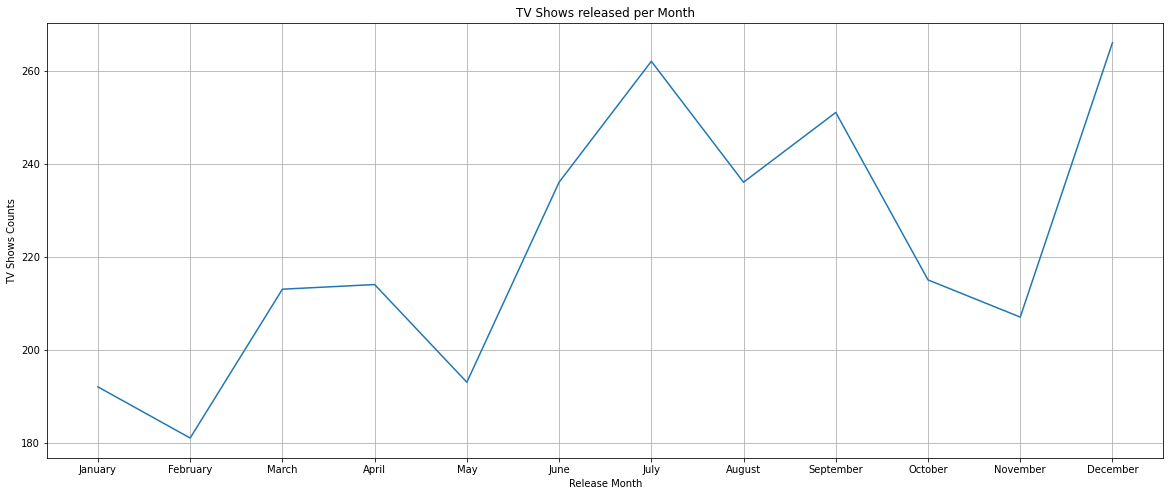

In [20]:
# Plotting Graph of TV Shows release per Month

plt.figure(figsize=(20,8))
plt.plot(tv_shows_monthly_count.index, tv_shows_monthly_count.values)
plt.xlabel('Release Month')
plt.ylabel('TV Shows Counts')
plt.title('TV Shows released per Month')
plt.grid(True)
plt.show()

### Recommendation :

>  There is a window of opportunity to get TV shows at the time of the year(February/May) when the releases as less, which might increase viewership/subscription for Netflix.



# *Analysis of actors/directors for TV Shows/Movies.*

In [21]:
# Expanding Rows which have more than one Cast entry

netflix_copy = netflix[netflix['cast'] != 'Data Not Available']
expanded_list = netflix_copy['cast'].apply(lambda x : str(x).split(',')).tolist()
netflix_cast_list = pd.DataFrame(expanded_list, index = netflix_copy['title'])
netflix_cast_list = netflix_cast_list.stack()
netflix_cast_list = pd.DataFrame(netflix_cast_list.reset_index())
netflix_cast_list.drop(['level_1'], axis = 1, inplace = True)
netflix_cast_list.rename(columns = {0:'Actors'}, inplace = True)
netflix_cast_expanded = netflix_cast_list.merge(netflix_copy[['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description']], on = ['title'], how = 'left')
netflix_cast_expanded['Actors'] = netflix_cast_expanded['Actors'].str.strip()

### Business Insight: 

> Amongst the most recurring actors (Top 15) in Movie content available on Netflix are Indians. 14 out of the Top 15 recurring actors in Movie Content are Indian.

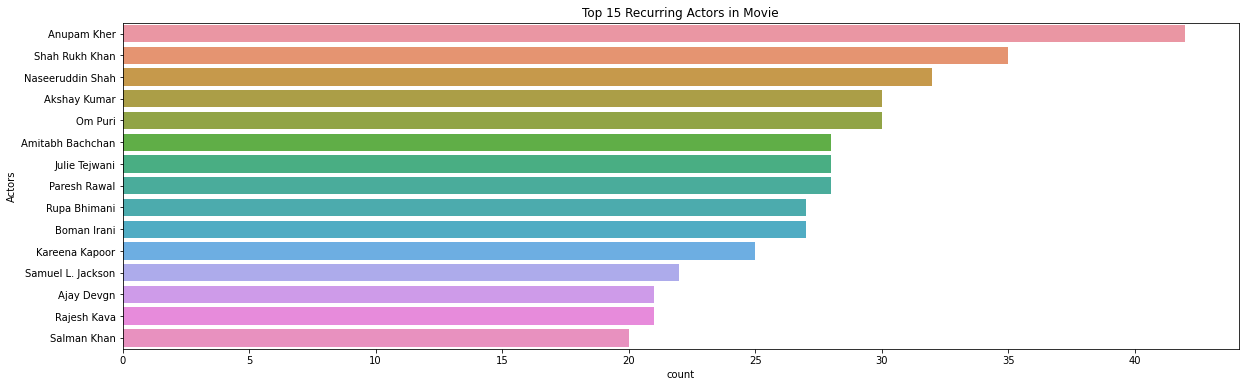

In [22]:
plt.figure(figsize=(20,6))
plt.title('Top 15 Recurring Actors in Movie')
sns.countplot(data = netflix_cast_expanded[(netflix_cast_expanded['Actors'] != 'Data_Not_Available') & (netflix_cast_expanded['type'] == 'Movie')], 
              y = 'Actors', 
              order = netflix_cast_expanded[(netflix_cast_expanded['Actors'] != 'Data_Not_Available') & (netflix_cast_expanded['type'] == 'Movie')]['Actors'].value_counts().index[:15], linewidth=0.5)

### Business Insight: 

> Amongst the most recurring actors (Top 15) in TV Shows content available on Netflix are Japanese. 13 out of the Top 15 recurring actors in TV Shows content are Japanese. The reason being the fact that most of these Japanese actors are voice-over artists for Anime Series.


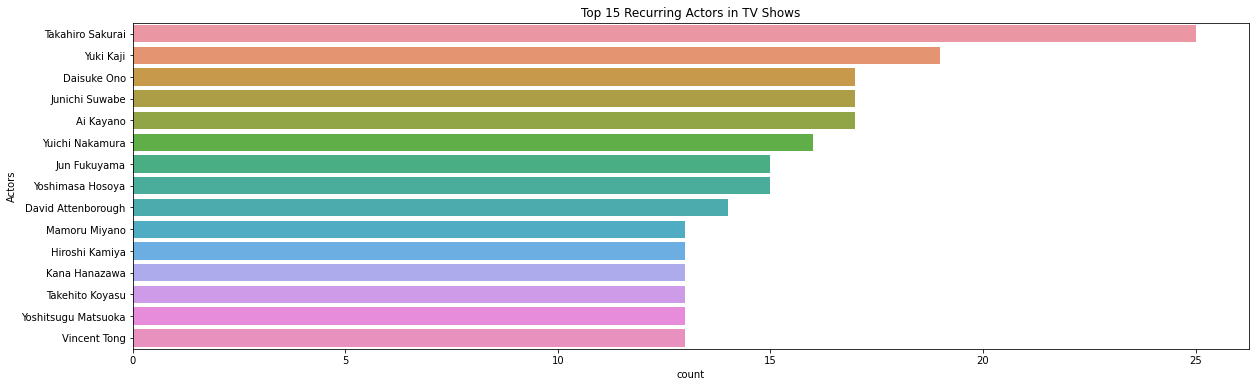

In [23]:
plt.figure(figsize=(20,6))
plt.title('Top 15 Recurring Actors in TV Shows')
sns.countplot(data = netflix_cast_expanded[(netflix_cast_expanded['Actors'] != 'Data_Not_Available') & (netflix_cast_expanded['type'] == 'TV Show')], 
              y = 'Actors', 
              order = netflix_cast_expanded[(netflix_cast_expanded['Actors'] != 'Data_Not_Available') & (netflix_cast_expanded['type'] == 'TV Show')]['Actors'].value_counts().index[:15], linewidth=0.5)

### Business Insight:

> Following are the list of top 10 directors (by Count of Movies) whose content are available on Netflix

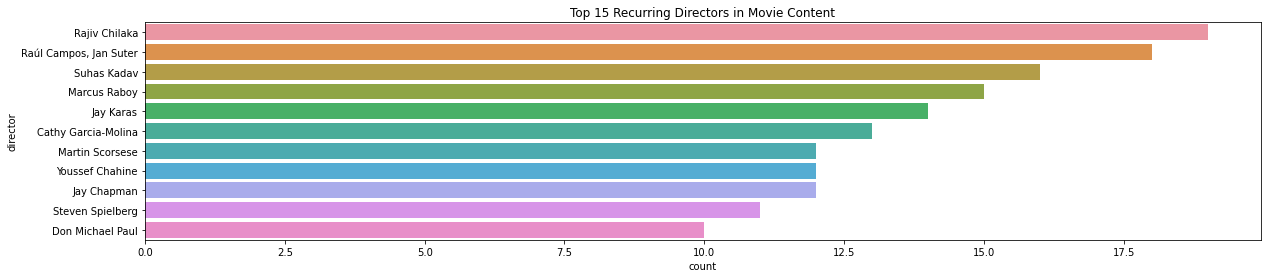

In [24]:
plt.figure(figsize=(20,4))
plt.title('Top 15 Recurring Directors in Movie Content')
sns.countplot(data = netflix[(netflix['director'] != 'Data_Not_Available') & (netflix['type'] == 'Movie')], 
              y = 'director', 
              order = netflix[(netflix['director'] != 'Data_Not_Available') & (netflix['type'] == 'Movie')]['director'].value_counts().index[:11], linewidth=0.5)

### Business Insight:

> Most (99%) of the TV Shows have new directors as we do not observe any significant top 10 directors (by Count of TV Shows)

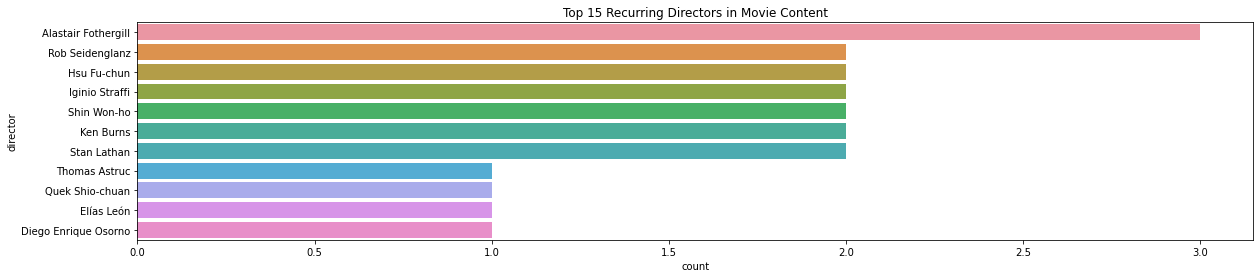

In [25]:
plt.figure(figsize=(20,4))
plt.title('Top 15 Recurring Directors in Movie Content')
sns.countplot(data = netflix[(netflix['director'] != 'Data_Not_Available') & (netflix['type'] == 'TV Show')], 
              y = 'director', 
              order = netflix[(netflix['director'] != 'Data_Not_Available') & (netflix['type'] == 'TV Show')]['director'].value_counts().index[:11], linewidth=0.5)

# *Exploring the Genre of Content on Netflix*

In [26]:
# Expanding Rows which have more than one Genre entry

expanded_list_genre = netflix['listed_in'].apply(lambda x : str(x).split(',')).tolist()
netflix_genre_list = pd.DataFrame(expanded_list_genre, index = netflix['title'])
netflix_genre_list = netflix_genre_list.stack()
netflix_genre_list = pd.DataFrame(netflix_genre_list.reset_index())
netflix_genre_list.drop(['level_1'], axis = 1, inplace = True)
netflix_genre_list.rename(columns = {0:'Genre'}, inplace = True)
netflix_genre_expanded = netflix_genre_list.merge(netflix[['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description']], on = ['title'], how = 'left')

In [27]:
netflix_genre_expanded['Genre'] = netflix_genre_expanded['Genre'].str.strip()

In [28]:
netflix_genre_count = netflix_genre_expanded['Genre'].value_counts()

### Business Insight: Following are the top 10 genre of content available on Netflix

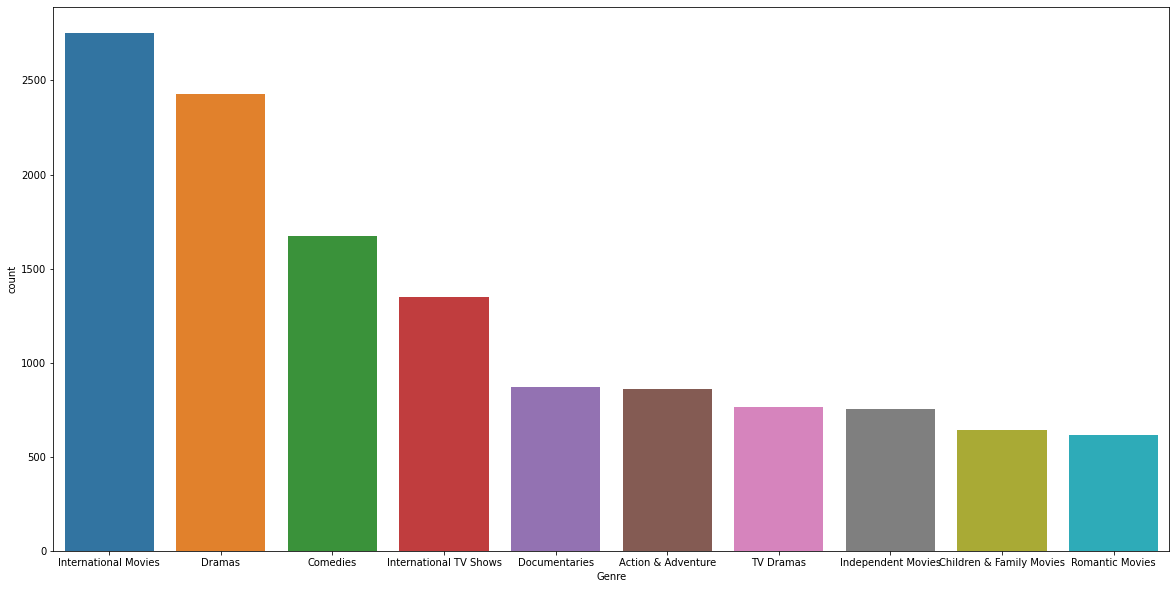

In [29]:
# Top 10 Genre-wise content available on Netflix

plt.figure(figsize=(20,10))
sns.countplot(data = netflix_genre_expanded, x = 'Genre', order = netflix_genre_expanded['Genre'].value_counts().index[:10], linewidth=0.5)

**Genre of TV Shows as per season**

In [30]:
# Creating a Pivot of Count of Genre vs Number of Seasons for TV Shows

seasons_vs_genre = netflix_genre_expanded[netflix_genre_expanded['type'] == 'TV Show']
netflix_seasons_count = seasons_vs_genre['duration'].value_counts()
seasons_vs_genre = seasons_vs_genre[seasons_vs_genre['duration'].isin(list(netflix_seasons_count.index))]
seasons_vs_genre['Count'] = 1
seasons_vs_genre = seasons_vs_genre[['Genre','duration','Count']]
df=seasons_vs_genre.pivot_table(index="duration",
                     columns="Genre",
                     aggfunc=["count"],
                     fill_value=0)

In [31]:
column_names = []

for x in df.columns:
  column_names.append(x[2])

df.columns = column_names
df = df.loc[['1 Season','2 Seasons','3 Seasons','4 Seasons','5 Seasons','6 Seasons','7 Seasons','8 Seasons','9 Seasons','10 Seasons','11 Seasons','12 Seasons','13 Seasons','15 Seasons','17 Seasons']]

### Business Insight: See Figure Below : Count of TV Shows vs Number of Seasons

> The Count of TV Shows is more for a duration of fewer than 4 Seasons. There is a sharp decline in the count of TV Shows as the number of seasons goes beyond 4.



In [32]:
netflix_seasons_count = netflix[netflix['type'] == 'TV Show']['duration'].value_counts()

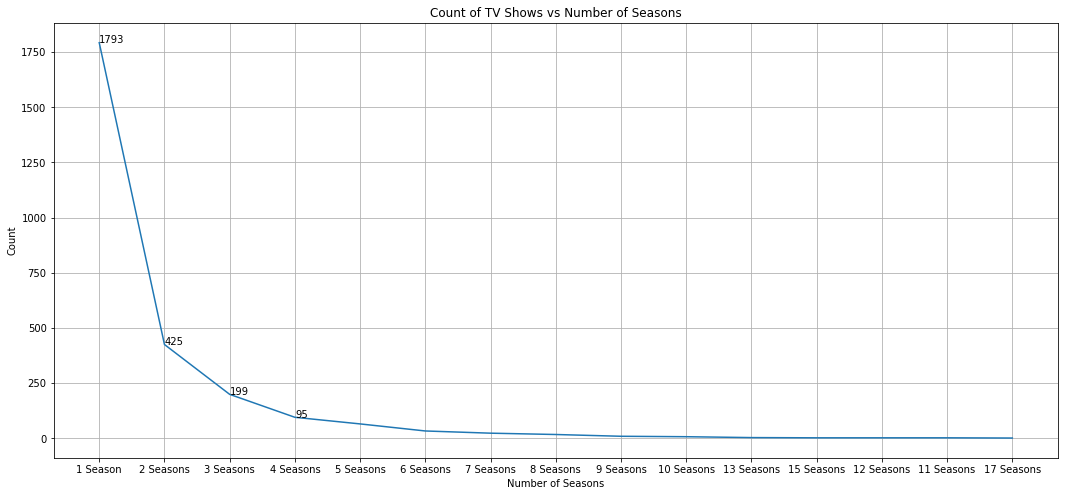

In [33]:
# Plotting Count of TV Shows vs Number of Seasons

plt.figure(figsize=(18,8))
plt.plot(netflix_seasons_count.index, netflix_seasons_count.values)
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.text('1 Season',netflix_seasons_count['1 Season'],netflix_seasons_count['1 Season'])
plt.text('2 Seasons',netflix_seasons_count['2 Seasons'],netflix_seasons_count['2 Seasons'])
plt.text('3 Seasons',netflix_seasons_count['3 Seasons'],netflix_seasons_count['3 Seasons'])
plt.text('4 Seasons',netflix_seasons_count['4 Seasons'],netflix_seasons_count['4 Seasons'])
plt.title('Count of TV Shows vs Number of Seasons')
plt.grid(True)
plt.show()

### Business Insight ( See Figure Below : Number of Seasons vs Genre of of TV Shows): 

> Amongst TV Shows: Crime, Docuseries, International, Romantic, TV Comedies, and TV Dramas are the most available content on Netflix (See Figure Below).

> The content of Classic & Cult, Action and Adventure, Mystery and Thriller Shows on Netflix are grossly outnumbered when compared to Crime, Docuseries, International, Romantic, TV Comedies, and TV Dramas. Reviving the Genre of content around Classic & Cult, or Thriller, or Action & Adventure TV Series on Netflix could act as a breath of fresh air in the sea of umpteen content on Crime, Docuseries, International, Romantic, TV Comedies, and TV Dramas.

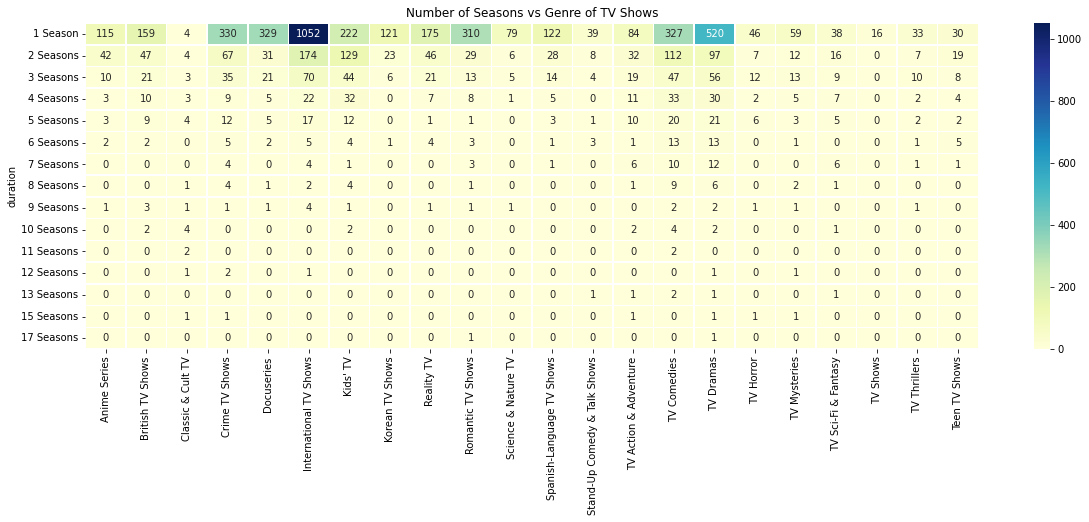

In [34]:
# Plotting HeatMap of Genre vs Number of Seasons for TV Shows

colormap = sns.color_palette("Blues")
plt.figure(figsize=(20,6))
plt.title('Number of Seasons vs Genre of TV Shows')
sns.heatmap(df, annot = True, fmt="d", linewidths=.5, linecolor='white', cmap="YlGnBu")

### Recommendation:

> There is a window of opportunity around creating good Classic & Cult or Thriller or Action & Adventure TV Series on Netflix as most of the content in the TV Shows is centered around Crime, Docuseries, International, and Romantic, TV Comedies, and TV Dramas.

# *Run Time of Movies*

In [35]:
netflix_movies['movie_minutes'] = netflix_movies['duration'].map(lambda x : x.split()[0])
netflix_movies['movie_minutes'] = netflix_movies['movie_minutes'].astype(str).astype(int)

### Business Insight:

> The distribution of run time of most movies is centered around 100 minutes



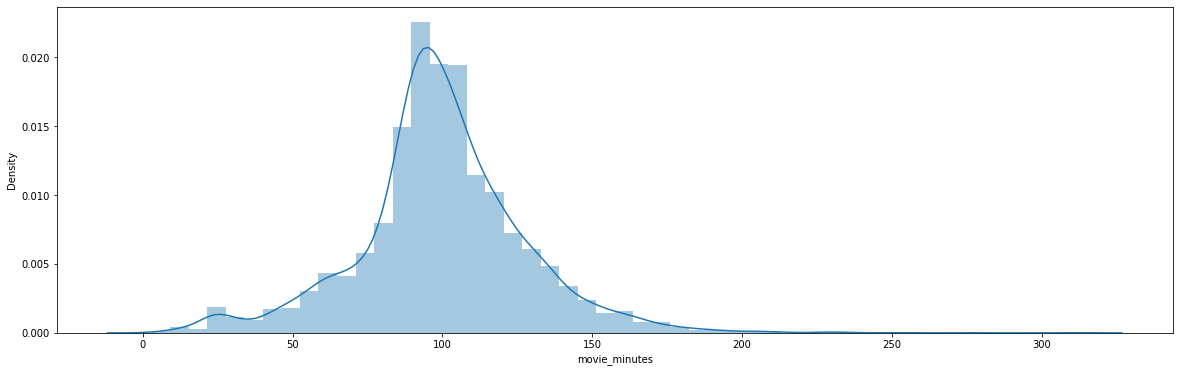

In [36]:
# Plotting distribution of Movies by Minutes

plt.figure(figsize=(20,6))
sns.distplot(netflix_movies['movie_minutes'])

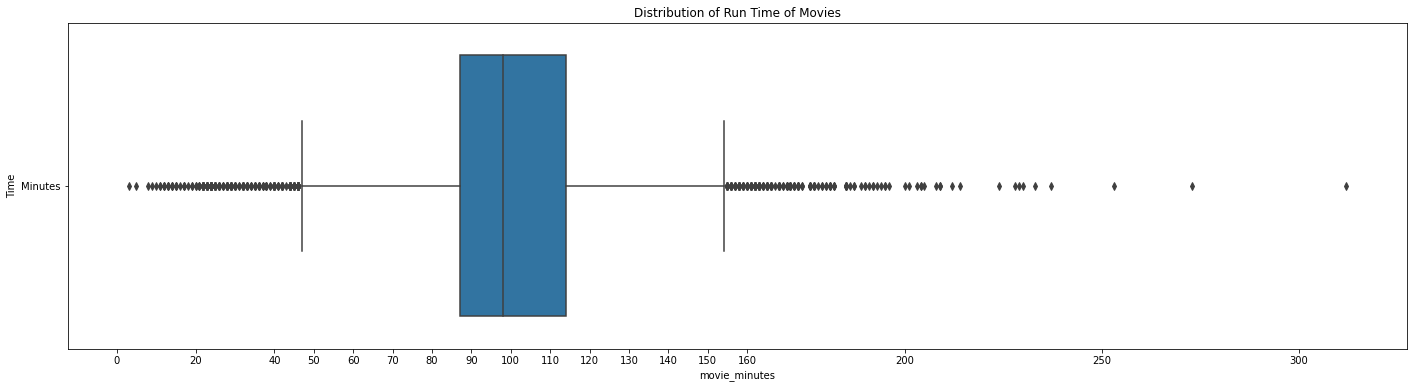

In [37]:
# Box Plot of distribution of Movies by Minutes

netflix_movies['Time'] = 'Minutes'
plt.figure(figsize=(24,6))
plt.xticks([0, 20, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 200, 250, 300])
plt.title('Distribution of Run Time of Movies')
sns.boxplot(data = netflix_movies, x = 'movie_minutes', y = 'Time')

### Business Insight (See Above Figure : Distribution of Run Time of Movies)

> 50% of the movies have a run time of 85 minutes to 115 minutes. Probably people cannot sit through longer movies or movies which span more than 160 minutes or 3 hours.

> There are also a large number of outliers or movies with run times less than 48 minutes or more than 155 minutes

**Let's Analyse the outliers in detail in the subsequent graphs**


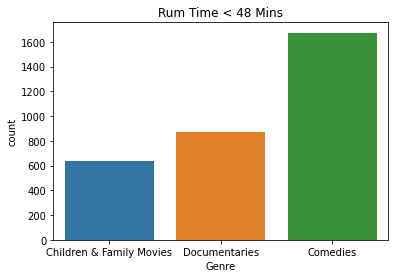

In [38]:
# Count Plot of Run Time of Movies with less than 48 minutes

movie_min = netflix_genre_expanded[netflix_genre_expanded['type'] == 'Movie']
movie_min['RunTime'] = movie_min['duration'].map(lambda x : x.split()[0]).astype(str).astype(int)
plt.title('Rum Time < 48 Mins')
sns.countplot(data = movie_min, x = 'Genre', order = movie_min[movie_min['RunTime'] < 48]['Genre'].value_counts().index[:3], linewidth=0.5)

### Business Insight:

> See Figure Above (Run Time < 48 Mins): Most of the movies which have a runtime of fewer than 48 minutes are largely Comedies, Documentaries, Children, and Family Movies.

> See Figure Below (Run Time >155 Mins): Movies that have a runtime of more than 155 minutes are largely Drama, International or Action & Adventure Movies


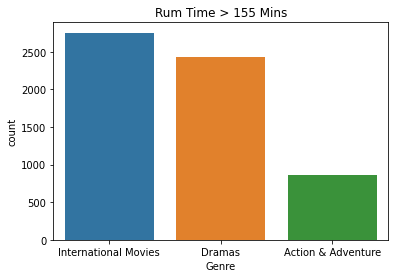

In [39]:
# Count Plot of Run Time of Movies with more than 155 minutes

movie_min[movie_min['RunTime'] > 155]['Genre'].value_counts()
plt.title('Rum Time > 155 Mins')
sns.countplot(data = movie_min, x = 'Genre', order = movie_min[movie_min['RunTime'] > 155]['Genre'].value_counts().index[:3], linewidth=0.5)

### Recommendation

> Preferred RunTime of Movies is 85-115 minutes.

> If movies are made for Children/Families, in particular, they should have less RunTime, preferably less than 50 minutes.

> Drama/Action & Adventure Movies can have a RunTime greater than 150 minutes.

# *Analysing Content Rating for Netflix in Different Countries*

In [40]:
# Expanding Rows which have more than one Country entry

expanded_country_list = netflix['country'].apply(lambda x : str(x).split(',')).tolist()
netflix_country_list = pd.DataFrame(expanded_country_list, index = netflix['title'])
netflix_country_list = netflix_country_list.stack()
netflix_country_list = pd.DataFrame(netflix_country_list.reset_index())
netflix_country_list.drop(['level_1'], axis = 1, inplace = True)
netflix_country_list.rename(columns = {0:'Country'}, inplace = True)
netflix_country_expanded = netflix_country_list.merge(netflix[['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description']], on = ['title'], how = 'left')
netflix_country_expanded['Country'] = netflix_country_expanded['Country'].str.strip()
netflix_country_count = netflix_country_expanded['Country'].value_counts()

In [41]:
# Creating a DataFrame of Top 10 Countries with most content on Netflix

netflix_country_top10 = netflix_country_expanded[netflix_country_expanded['Country'].isin(list(netflix_country_count.index)[:11])]
netflix_country_top10 = netflix_country_top10[['Country','rating']]
netflix_country_top10['Count'] = 1

In [42]:
# Creating a Pivot of Rating Count vs Top 10 Country with most content on Netflix

df=netflix_country_top10.pivot_table(index="Country",
                     columns="rating",
                     aggfunc=["count"],
                     fill_value=0)

column_names = []

for x in df.columns:
  column_names.append(x[2])

df.columns = column_names
df = df.loc[['United States',
 'India',
 'Data_Not_Available',
 'United Kingdom',
 'Canada',
 'France',
 'Japan',
 'Spain',
 'South Korea',
 'Germany',
 'Mexico']]

### Business Insight (See Figure Below : Top 10 Countries vs Content Ratings of Movies)


> United States, India, United Kingdom, Canada, France, Japan, Spain, South Korea, and Germany are the top 10 countries with the most amount of movie content on Netflix.

> United States, United Kingdom, Canada, and France have a large content of Movies/TV Shows which require parental guidance for people with age less than 14 years or below or have strong violence, sexuality, drug use, and obscene language. In comparison, India, Japan, Spain, South Korea, Germany, and Mexico have relatively less content on Netflix for such rated Movies or TV Shows.

> The content of movies for people age more than 17 or mature audiences are fairly distributed amongst these top 10 countries.

> Content that has visually disturbing images for kids less than 7 years of age has nearly zero or no content on Netflix irrespective of country.

**For more understanding on Rating System of Movies and TV Shows** : https://en.wikipedia.org/wiki/Television_content_rating_system



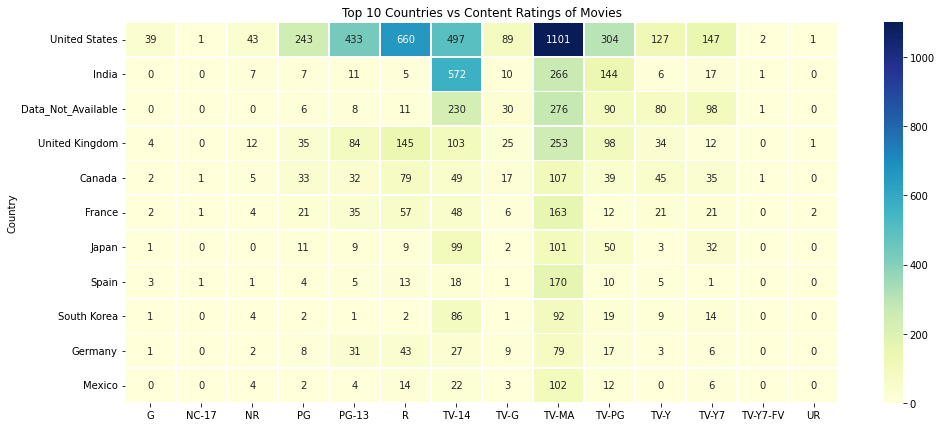

In [43]:
# Creating a Heatmap of Top 10 Country with most content on Netflix vs Count of Rating

colormap = sns.color_palette("Blues")
plt.figure(figsize=(16,7))
plt.title('Top 10 Countries vs Content Ratings of Movies')
sns.heatmap(df, annot = True, fmt="d", linewidths=.5, linecolor='white', cmap="YlGnBu")

### Recommendation:

> Netflix should stay away from UnRated Movies or movies which have visually disturbing images for children less than 7 years

> For India, Japan, Spain, South Korea and Mexio, Netflix should produce limited or less content which involves strong violence, sexuality, drug use, and obscene language.

> Content for the mature audience is something that can be produced irrespective of country or location


In [44]:
# Creating a Pivot of Rating Count vs Bottom 40 Country with most content on Netflix

netflix_country_bottom40 = netflix_country_expanded[netflix_country_expanded['Country'].isin(list(netflix_country_count.index)[-40:])]
netflix_country_bottom40 = netflix_country_bottom40[['Country','rating']]
netflix_country_bottom40['Count'] = 1
df=netflix_country_bottom40.pivot_table(index="rating",
                     columns="Country",
                     aggfunc=["count"],
                     fill_value=0)

In [45]:
column_names = []

for x in df.columns:
  column_names.append(x[2])

df.columns = column_names

### Business Insight (See Figure Below: Bottom 40 Countries vs Content Ratings of Movies')

> Below are the list of countries that have 1 or 2 content on Netflix

> A Large number of these countries have content for a mature audience



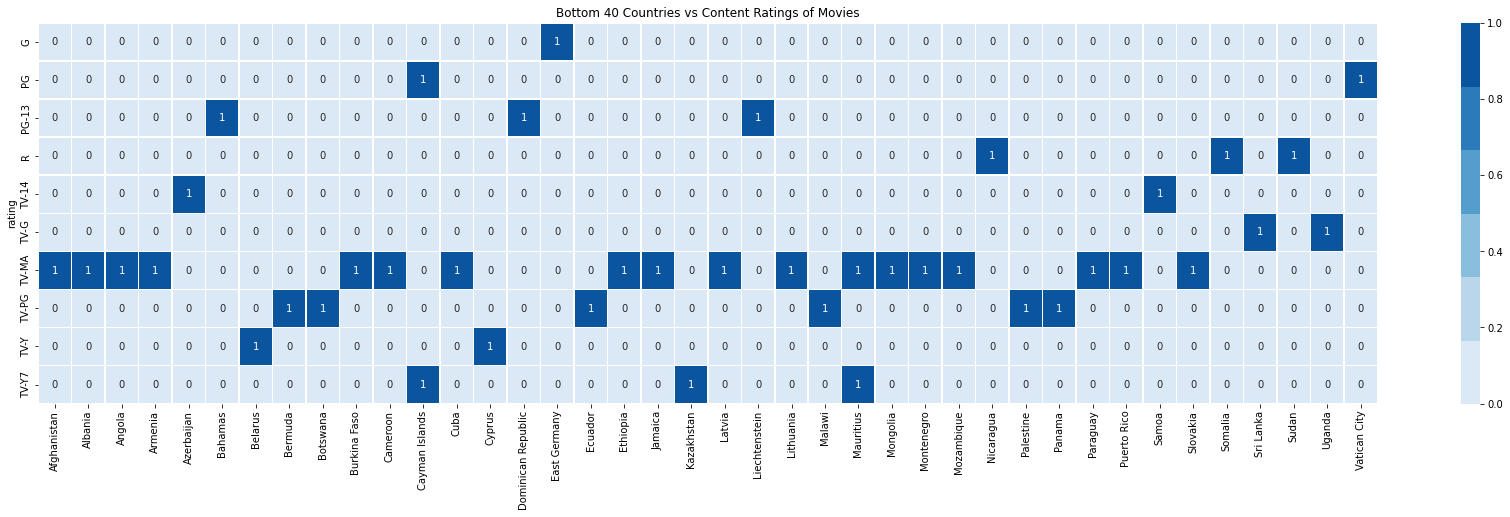

In [46]:
# Creating a Heatmap of Bottom 40 Country with most content on Netflix vs Count of Rating

colormap = sns.color_palette("Blues")
plt.figure(figsize=(30,7))
plt.title('Bottom 40 Countries vs Content Ratings of Movies')
sns.heatmap(df, annot = True, fmt="d", linewidths=.5, linecolor='white', cmap = colormap)

### Recommendation :

> If Netflix is planning to increase its footprint in a country with limited or no presence, it should stick to content for a mature audience